**The program performs exploratory data analysis and predictive modeling on a dataset of students’ exam scores. It loads the data from student_exam_scores.csv into a pandas DataFrame, creates a derived categorical variable isPassed, and computes descriptive statistics for the main features. Relationships between study habits and performance are explored using scatter plots with a pass/fail hue, linear regression plots, correlation heatmaps, and histograms of key variables. The data is then split into training and test sets, and two regression models (Linear Regression and Random Forest) are trained to predict exam_score. Their performance is evaluated using MSE and R² on both train and test sets, the results are summarized in a comparison table, and an additional scatter plot compares predicted vs. actual exam scores for the linear model.**

Importing libraries.

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Loading data.

In [29]:
scores = pd.read_csv("student_exam_scores.csv", delimiter=",")

  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  


Printing information about dataframe.

In [54]:
scores.dtypes


student_id             object
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
isPassed               object
dtype: object

In [55]:
scores.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,isPassed
0,S001,8.0,8.8,72.1,45,30.2,Passed
1,S002,1.3,8.6,60.7,55,25.0,Failed
2,S003,4.0,8.2,73.7,86,35.8,Passed
3,S004,3.5,4.8,95.1,66,34.0,Passed
4,S005,9.1,6.4,89.8,71,40.3,Passed


Printing basic statistics of dataset.

In [30]:
scores.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


Checking dataset for null values and dropping duplicates.

In [32]:
scores.isna().sum()
scores.drop_duplicates()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


Creating a new categorical column "isPassed".

In [56]:
scores["isPassed"] = np.where(scores["exam_score"] > 30.0, "Passed", "Failed")

Visualization of the relationship between hours studied and exam score.

[Text(0.5, 0, 'Hours Studied'), Text(0, 0.5, 'Exam Score')]

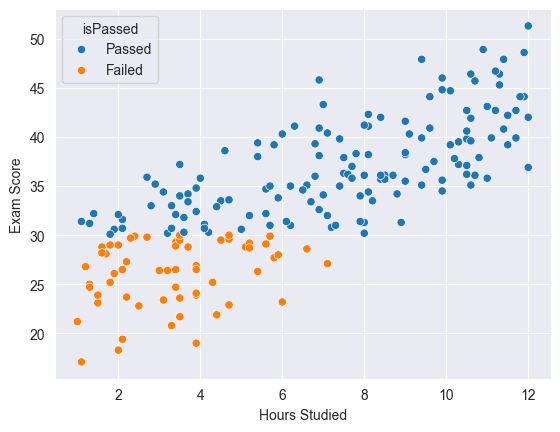

In [57]:
plot = sns.scatterplot(scores, x="hours_studied", y="exam_score", hue="isPassed")
plot.set(xlabel = "Hours Studied", ylabel = "Exam Score")

Visualization of the relationship between hours studied and exam score using linear regression plot.

<Figure size 600x400 with 0 Axes>

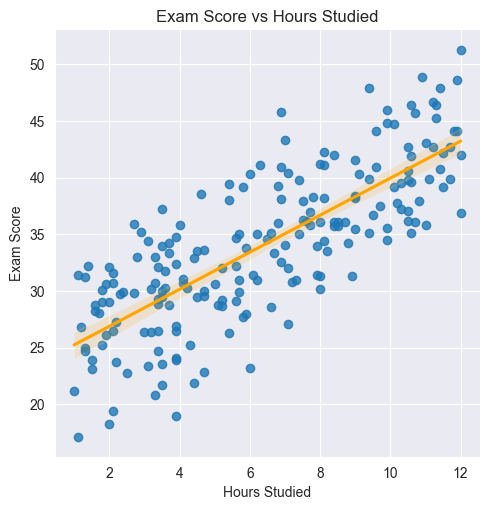

In [58]:
plt.figure(figsize = (6,4))
plot = sns.lmplot(scores, x="hours_studied", y="exam_score", line_kws={"color": "orange"})
plot.set(xlabel = "Hours Studied", ylabel = "Exam Score", title="Exam Score vs Hours Studied")

Visualization of the relationship between attendance percent and exam score using linear regression plot.

<Figure size 600x400 with 0 Axes>

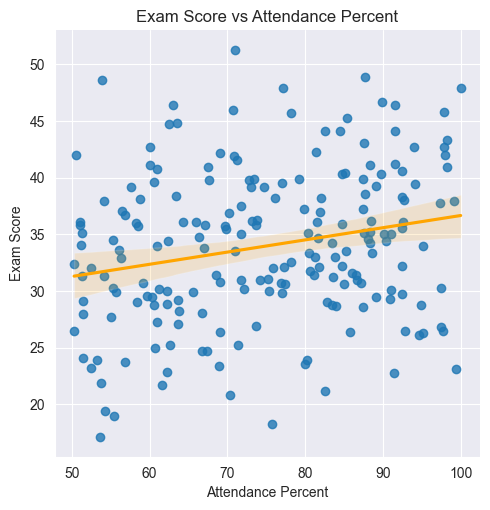

In [35]:
plt.figure(figsize = (6,4))
plot = sns.lmplot(scores, x="attendance_percent", y="exam_score", line_kws={"color": "orange"})
plot.set(xlabel = "Attendance Percent", ylabel = "Exam Score", title="Exam Score vs Attendance Percent")

Creating a correlation matrix out of numeric values.

In [61]:
corr = scores[["hours_studied", "sleep_hours", "exam_score", "attendance_percent"]].corr()
print(corr)

                    hours_studied  sleep_hours  exam_score  attendance_percent
hours_studied            1.000000     0.077864    0.776751           -0.031311
sleep_hours              0.077864     1.000000    0.188222            0.000572
exam_score               0.776751     0.188222    1.000000            0.225713
attendance_percent      -0.031311     0.000572    0.225713            1.000000


A positive correlation can be observed between hours_studied and exam score, implying that the number of hours studied is associated with the score of exam.

There is a direct relationship between hours studied and exam score.

Creating a correlation heatmap.

<Axes: >

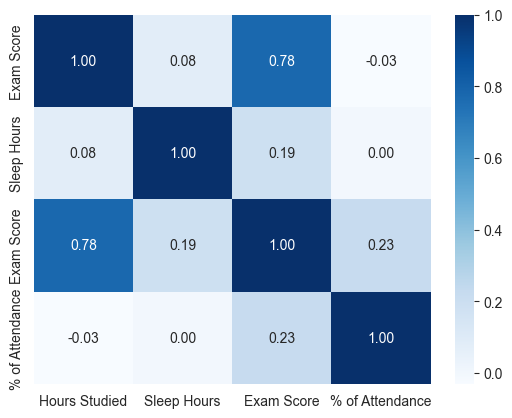

In [65]:
x_labels = ["Hours Studied", "Sleep Hours", "Exam Score", "% of Attendance"]
y_labels = ["Exam Score", "Sleep Hours", "Exam Score", "% of Attendance"]
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", xticklabels=x_labels, yticklabels=y_labels)

Creating plots showing distributions of study habits and performance.

Text(0.5, 0.98, 'Distribution of Exam Scores and Habits of Students')

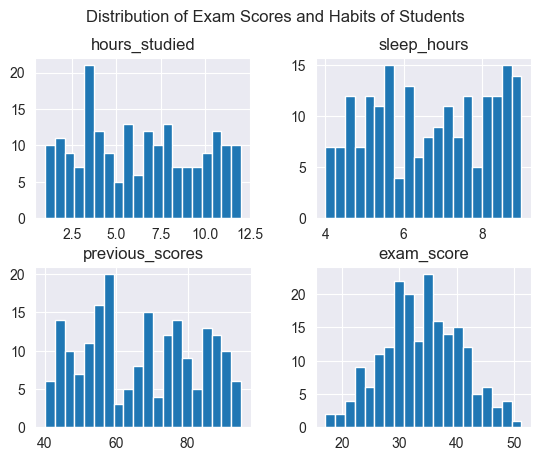

In [66]:
plot = scores[["hours_studied", "sleep_hours", "previous_scores", "exam_score"]].hist(bins=20)
plt.suptitle("Distribution of Exam Scores and Habits of Students")

Splitting numeric data to train and test sets.

In [39]:
y = scores[["exam_score"]]
x = scores.drop(["exam_score", "student_id", "isPassed"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

A linear regression model was fitted on the training data.

In [40]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Generating predictions for both training and test set.

In [72]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
print(y_lr_train_pred[:5])

array([[27.88123664],
       [36.15845932],
       [33.77975984],
       [34.72220155],
       [22.62250902]])

In [73]:
print(y_lr_test_pred[:5])

[[28.96606215]
 [20.85361165]
 [36.39543205]
 [39.73621892]
 [31.87043094]]


Model performance was evaluated using MSE and R2 for both training and test set.

In [43]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [44]:
print("LS MSE (Train): ", lr_train_mse)
print("LS R2 (Train): ", lr_train_r2)
print("LS MSE (Test): ", lr_test_mse)
print("LS R2 (Test): ", lr_test_r2)

LS MSE (Train):  7.167182016317801
LS R2 (Train):  0.8412909628396832
LS MSE (Test):  8.37137635264973
LS R2 (Test):  0.8205275135283744


In [45]:
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,7.167182,0.841291,8.371376,0.820528


A random forest regressor model was fitted on the training data.


In [46]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
y_train_1d = y_train.values.ravel()
rf.fit(x_train, y_train_1d)

,n_estimators,100
,criterion,'squared_error'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

Generating predictions for both data sets.

In [48]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [49]:
rf_results = pd.DataFrame(["Random Forest", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,14.004342,0.68989,17.062459,0.634201


Comparison of two used models (linear regression and random forest).

In [50]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,7.167182,0.841291,8.371376,0.820528
1,Random Forest,14.004342,0.68989,17.062459,0.634201


Visualization of predictions.

[]

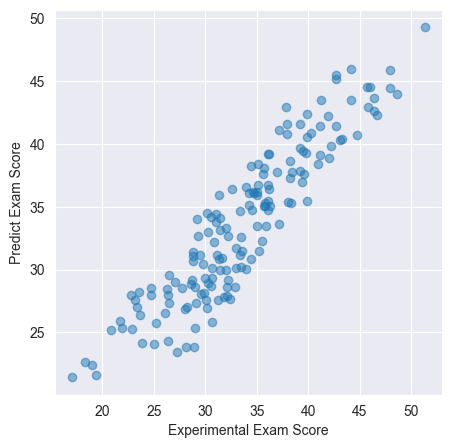

In [51]:
plt.figure(figsize=[5,5])
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.5)

plt.ylabel("Predict Exam Score")
plt.xlabel("Experimental Exam Score")
plt.plot()